# Post Analysis 2 - 2022 TOP 5 counties in Small Merchant Revenue

In this notebook, I analyze the forecasted data. I find the TOP 5 counties in terms of small merchant revenue changes and plot them on a map using Geo Pandas.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

First, I load my revenue forecast data. 

In [2]:
# Read revenue forecast data 
df = pd.read_csv('Data/revenue_forecast.csv')

# Define year column
df['year']=df.date.astype(str).str[:4]

df.head()

,countyfips,date,revenue_all,yoy_change,year,month,yearmonth,day,Date
0,11001,2020-01-11 00:00:00,0.0302,NaN,2020,1.0,2020-01,11.0,2020-01-11
1,24009,2020-01-11 00:00:00,0.0136,NaN,2020,1.0,2020-01,11.0,2020-01-11
2,24017,2020-01-11 00:00:00,0.0810,NaN,2020,1.0,2020-01,11.0,2020-01-11
3,24021,2020-01-11 00:00:00,-0.0298,NaN,2020,1.0,2020-01,11.0,2020-01-11
4,24031,2020-01-11 00:00:00,-0.0524,NaN,2020,1.0,2020-01,11.0,2020-01-11


Next, I load US county shape file for Geo Panda.  

In [3]:
county = gpd.read_file("Shape/US_County_Boundaries/US_County_Boundaries.shp")
county.CTFIPS = county.CTFIPS.astype('int')
county.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
0,02,2016,Alaska,Aleutians West,05,62.576763,1.540013,"MULTIPOLYGON (((-170.34620 57.21312, -170.3328..."
1,02,2290,Alaska,Yukon-Koyukuk,05,63.135667,74.225260,"POLYGON ((-147.99746 64.34170, -148.04161 64.3..."
2,02,2185,Alaska,North Slope,05,130.327563,52.678634,"MULTIPOLYGON (((-149.74913 70.49325, -149.7479..."
3,02,2188,Alaska,Northwest Arctic,05,88.348799,19.328173,"MULTIPOLYGON (((-162.52343 66.04237, -162.5296..."
4,02,2240,Alaska,Southeast Fairbanks,05,21.362151,11.848211,"POLYGON ((-146.48418 63.17392, -146.48920 63.2..."


Next I merge county shape file to my Geo IDs data to drop counties outside of Washington DC Metro Area.

In below, I load my Geo IDs data.  

In [4]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')

Next, I merge county shape file to Geo IDs data and drop counties outside of Washington DC Metro Area. 

<AxesSubplot:>

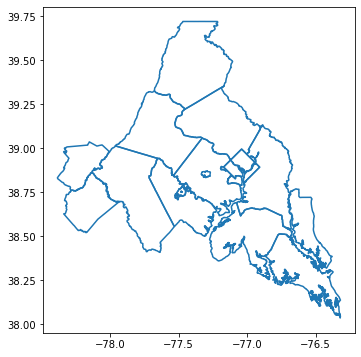

In [5]:
map_county = county.merge(cz, on = 'CTFIPS', how='inner')
map_county.drop_duplicates(inplace=True)
map_county.boundary.plot(figsize=(6, 6))

Now I have a county shape file which includes only Washington DC metro area as above.

Next, I merge the county shape file with merchant revenue forecast data to plot on a map.

In [6]:
df_map = map_county.merge(df, left_on='CTFIPS', right_on='countyfips', how ='outer')


Next, I plot the TOP 5 counties in terms of small merchant revenue changes. 

For this purpose, I calculate the average revenue changes by year and create a new data frame for 2022 forecasted revenue changes.

In [7]:
# Take Average 
df_month= df_map.groupby(['countyfips', 'yearmonth']).mean()
df_month.reset_index(inplace=True)

# Merge with county map shape file 
df_map_month = map_county.merge(df_month, left_on='CTFIPS', right_on='countyfips', how ='inner')

# create data frame for 2022 forecasted revenue changes 
dfm22 = df_map_month[df_map_month.yearmonth=='2022-12']

I plot TOP 5 counties in terms of marchants opening changes in 2022

In [8]:
# Get top 5 county names from the 2022 forecast data 
top5 = dfm22.sort_values('revenue_all', ascending=False).head(5)

top5[['STATE', 'COUNTY']]

,STATE,COUNTY
331,Virginia,Fairfax
294,Virginia,Falls Church
368,Virginia,Alexandria
590,Maryland,St. Mary's
35,Maryland,Frederick


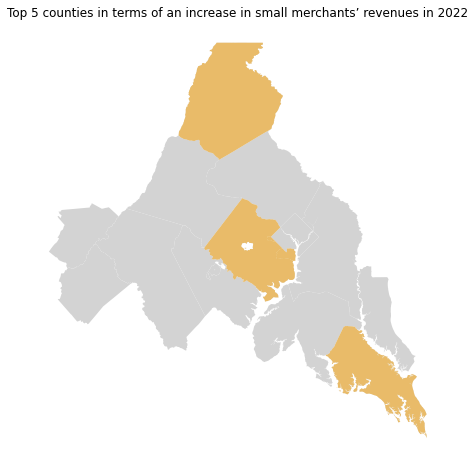

In [9]:
# Map TOP5 

fig, ax = plt.subplots(figsize = (8,8))
map_county.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top5.plot(ax=ax, color='orange', alpha=0.5)
ax.set_title('Top 5 counties in terms of an increase in small merchants’ revenues in 2022')
ax.axis("off");

The above counties are promising neighborhoods in 2022 in terms of small merchants' revenue!! 